In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

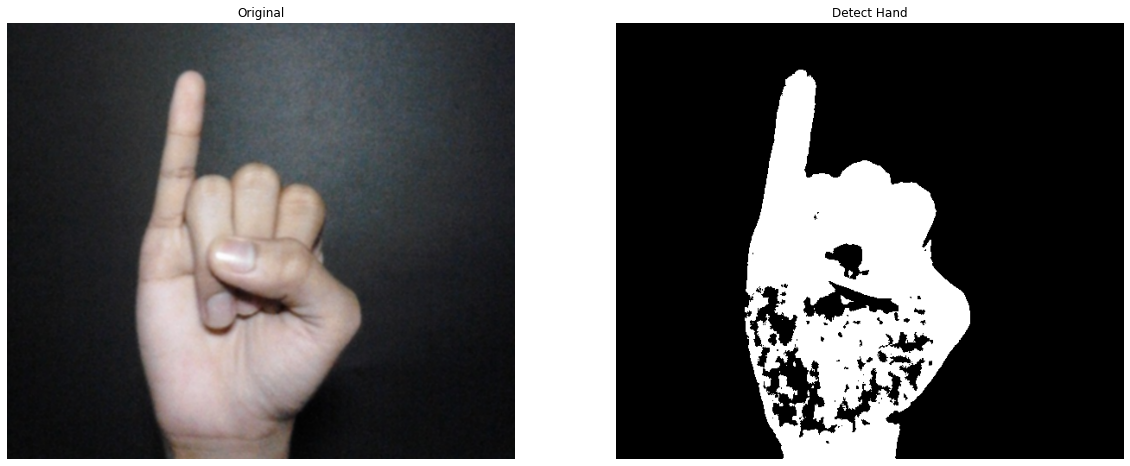

In [12]:
src=cv2.imread('./data/hand.png')
hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
lower=np.array([0,10,80],dtype='uint8')
upper=np.array([30,255,255],dtype='uint8')
dst=cv2.inRange(hsv,lower,upper)

src=cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
image1=plt.subplot(1,2,1)
image1.set_title('Original')
plt.axis('off')
plt.imshow(src)

image2=plt.subplot(1,2,2)
image2.set_title('Detect Hand')
plt.axis('off')
plt.imshow(dst,cmap="gray")

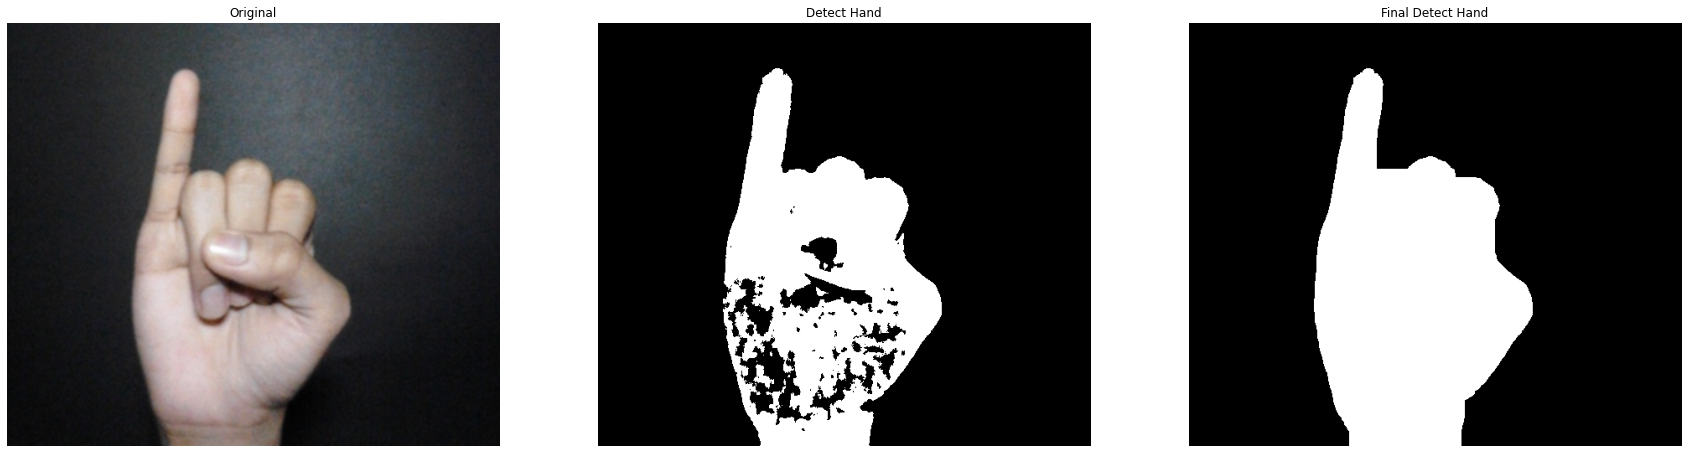

In [13]:
kernel=cv2.getStructuringElement(shape=cv2.MORPH_RECT,ksize=(7,7))
mor_close=cv2.morphologyEx(dst,cv2.MORPH_CLOSE,kernel,iterations=5)

plt.figure(figsize=(30,30))
image1=plt.subplot(1,3,1)
image1.set_title('Original')
plt.axis('off')
plt.imshow(src)

image1=plt.subplot(1,3,2)
image1.set_title('Detect Hand')
plt.axis('off')
plt.imshow(dst,cmap="gray")

image2=plt.subplot(1,3,3)
image2.set_title('Final Detect Hand')
plt.axis('off')
plt.imshow(mor_close,cmap='gray')

In [4]:
def onChange(pos):
    global img,mask,hsv
    l=cv2.getTrackbarPos('V-lower','img')
    u=cv2.getTrackbarPos('V-upper','img')
    lower=np.array([0,0,l],dtype='uint8')
    upper=np.array([255,255,u],dtype='uint8')
    mask=cv2.inRange(hsv,lower,upper)
    cv2.imshow('mask',mask)

In [9]:
img=cv2.imread('./data/candies.png')
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
mask=np.zeros_like(img,dtype=np.uint8)
cv2.imshow('img',img)
cv2.imshow('mask',mask)

# 트랙바 생성
cv2.createTrackbar('V-lower','img',0,255,onChange)
cv2.createTrackbar('V-upper','img',0,255,onChange)

# 트랙바 위치 초기화
cv2.setTrackbarPos('V-lower','img',0)
cv2.setTrackbarPos('V-upper','img',0)

cv2.waitKey()
cv2.destroyAllWindows()